# Name: Rohit Kulkarni USC ID: 5402749044

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from numpy  import array
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns; sns.set(style="ticks", color_codes=True,font_scale=2)
import scipy, scipy.stats
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm


Reading the first sheet

In [2]:
xls = pd.ExcelFile('Folds5x2_pp.xlsx')
data = pd.read_excel(xls, 'Sheet1')

In [3]:
count_row = data.shape[0] 
count_col = data.shape[1]

Number of rows

In [4]:
print(count_row)

9568


Number of columns

In [5]:
print(count_col)

5


Pairwise scatter plot

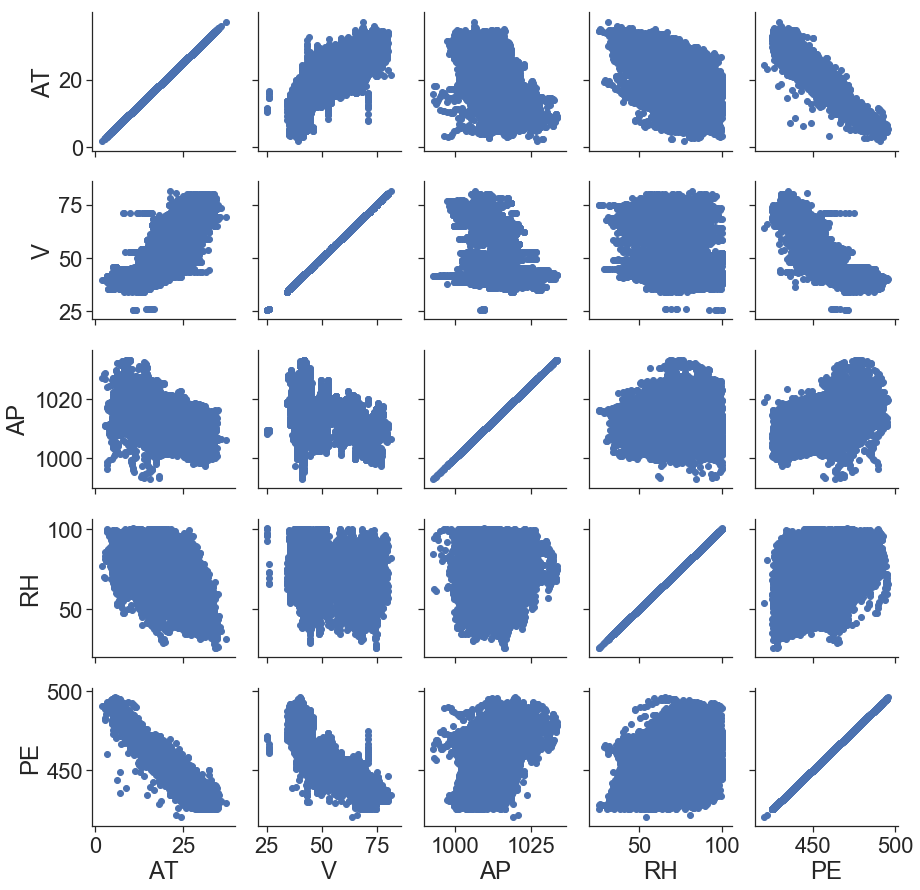

In [6]:
g = sns.PairGrid(data)
g = g.map(plt.scatter)

Summary

In [7]:
summary_table=pd.DataFrame(columns=['Variable Name','Mean','Median','Range','1 quartile range','3 quartile range','Interquartile range'])
summary_table=summary_table.append({'Variable Name':'Ambient Temperature','Mean':data['AT'].mean(),'Median':data['AT'].median(),'Range':data['AT'].max()-data['AT'].min(),'1 quartile range':data['AT'].quantile(0.25),'3 quartile range':data['AT'].quantile(0.75),'Interquartile range':data['AT'].quantile(0.75)-data['AT'].quantile(0.25)}, ignore_index=True)
summary_table=summary_table.append({'Variable Name':'Exhaust Vacuum','Mean':data['V'].mean(),'Median':data['V'].median(),'Range':data['V'].max()-data['V'].min(),'1 quartile range':data['V'].quantile(0.25),'3 quartile range':data['V'].quantile(0.75),'Interquartile range':data['V'].quantile(0.75)-data['V'].quantile(0.25)}, ignore_index=True)
summary_table=summary_table.append({'Variable Name':'Ambient Pressure','Mean':data['AP'].mean(),'Median':data['AP'].median(),'Range':data['AP'].max()-data['AP'].min(),'1 quartile range':data['AP'].quantile(0.25),'3 quartile range':data['AP'].quantile(0.75),'Interquartile range':data['AP'].quantile(0.75)-data['AP'].quantile(0.25)}, ignore_index=True)
summary_table=summary_table.append({'Variable Name':'Relative Humidity','Mean':data['RH'].mean(),'Median':data['RH'].median(),'Range':data['RH'].max()-data['RH'].min(),'1 quartile range':data['RH'].quantile(0.25),'3 quartile range':data['RH'].quantile(0.75),'Interquartile range':data['RH'].quantile(0.75)-data['RH'].quantile(0.25)}, ignore_index=True)
summary_table=summary_table.append({'Variable Name':'Electrical Energy Output','Mean':data['PE'].mean(),'Median':data['PE'].median(),'Range':data['PE'].max()-data['PE'].min(),'1 quartile range':data['PE'].quantile(0.25),'3 quartile range':data['PE'].quantile(0.75),'Interquartile range':data['PE'].quantile(0.75)-data['PE'].quantile(0.25)}, ignore_index=True)

In [8]:
summary_table

,Variable Name,Mean,Median,Range,1 quartile range,3 quartile range,Interquartile range
0,Ambient Temperature,19.651231,20.345,35.30,13.5100,25.72,12.2100
1,Exhaust Vacuum,54.305804,52.080,56.20,41.7400,66.54,24.8000
2,Ambient Pressure,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
3,Relative Humidity,73.308978,74.975,74.60,63.3275,84.83,21.5025
4,Electrical Energy Output,454.365009,451.550,75.50,439.7500,468.43,28.6800


Creating training and test data

In [9]:
Training_data = data.head(7568)
Test_data = data.tail(2000)

Simple linear regression for Ambient Temperature

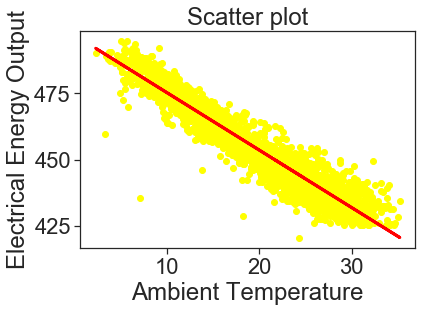

In [10]:
X_Coefficients=[]
Test_error_linear=[]
X_Test_A = Test_data.iloc[:,0:1].values
Y_Test_A = Test_data.iloc[:,-1].values

X_Training_A = Training_data.iloc[:,0:1].values
Y_Training_A = Training_data.iloc[:,-1].values

model = LinearRegression()
model.fit(X_Training_A, Y_Training_A)
y_pred = model.predict(X_Test_A) 
plt.scatter(X_Test_A,Y_Test_A, color='Yellow')
plt.title('Scatter plot')
plt.xlabel('Ambient Temperature')
plt.ylabel('Electrical Energy Output')
plt.plot(X_Test_A, y_pred, color='Red', linewidth=3)
plt.savefig('1.png')
plt.show()
X_Coefficients.append(model.coef_)
Test_error_linear=Test_error_linear.append(model.score(X_Test_A, Y_Test_A))

Simple linear regression for Exhaust Vaccum

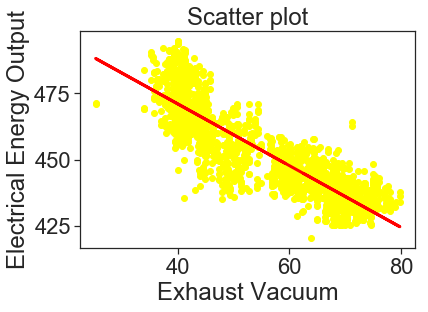

In [11]:
X_Test_V = Test_data.iloc[:,1:2].values
Y_Test_V = Test_data.iloc[:,-1].values

X_Training_V = Training_data.iloc[:,1:2].values
Y_Training_V = Training_data.iloc[:,-1].values

model = LinearRegression()
model.fit(X_Training_V, Y_Training_V)
y_pred = model.predict(X_Test_V) 
plt.scatter(X_Test_V,Y_Test_V, color='Yellow')
plt.title('Scatter plot')
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Electrical Energy Output')
plt.plot(X_Test_V, y_pred, color='Red', linewidth=3)
plt.savefig('2.png')
plt.show()
X_Coefficients=np.append(X_Coefficients,model.coef_)
Test_error_linear=np.append(Test_error_linear,model.score(X_Test_V, X_Test_V))

Simple linear regression for Ambient Pressure

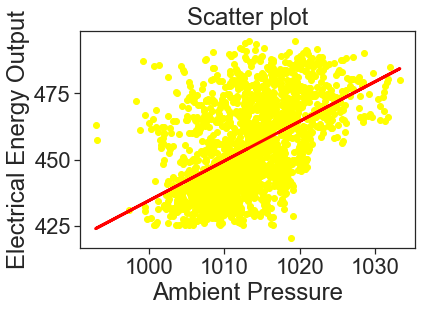

In [12]:
X_Test_AP = Test_data.iloc[:,2:3].values
Y_Test_AP = Test_data.iloc[:,-1].values

X_Training_AP = Training_data.iloc[:,2:3].values
Y_Training_AP = Training_data.iloc[:,-1].values

model = LinearRegression()
model.fit(X_Training_AP, Y_Training_AP)
y_pred = model.predict(X_Test_AP) 
plt.scatter(X_Test_AP,Y_Test_AP, color='Yellow')
plt.title('Scatter plot')
plt.xlabel('Ambient Pressure')
plt.ylabel('Electrical Energy Output')
plt.plot(X_Test_AP, y_pred, color='Red', linewidth=3)
plt.savefig('3.png')
plt.show()
X_Coefficients=np.append(X_Coefficients,model.coef_)
Test_error_linear=np.append(Test_error_linear,model.score(X_Test_AP, Y_Test_AP))

Simple linear regression for Relative humidity

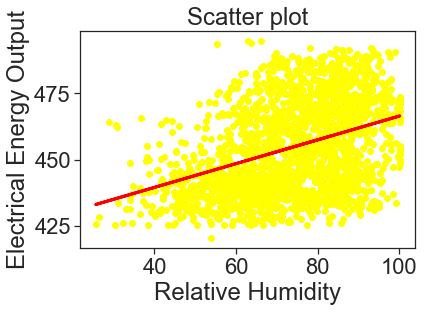

In [36]:
X_Test_RH = Test_data.iloc[:,3:4].values
Y_Test_RH = Test_data.iloc[:,-1].values

X_Training_RH = Training_data.iloc[:,3:4].values
Y_Training_RH = Training_data.iloc[:,-1].values

model = LinearRegression()
model.fit(X_Training_RH, Y_Training_RH)
y_pred = model.predict(X_Test_RH) 
plt.scatter(X_Test_RH,Y_Test_RH, color='Yellow')
plt.title('Scatter plot')
plt.xlabel('Relative Humidity')
plt.ylabel('Electrical Energy Output')
plt.plot(X_Test_RH, y_pred, color='Red', linewidth=3)
plt.savefig('4.png')
plt.show()
X_Coefficients=np.append(X_Coefficients,model.coef_)
Test_error_linear=np.append(Test_error_linear,model.score(X_Test_RH, Y_Test_RH))

Linear regression for multivariate

In [14]:
X_Test=Test_data.iloc[:,:-1]
Y_Test=Test_data.iloc[:, 4]
X_Training=Training_data.iloc[:,:-1]
Y_Training=Training_data.iloc[:, 4]

model = LinearRegression()
model.fit(X_Training, Y_Training)
y_pred = model.predict(X_Test) 
Y_Coefficients=model.coef_
model = sm.OLS(Y_Training,X_Training)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.550e+07
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:18:23   Log-Likelihood:                -22954.
No. Observations:                7568   AIC:                         4.592e+04
Df Residuals:                    7564   BIC:                         4.594e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.6922      0.017    -98.533      0.000      -1.726      -1.659
V             -0.2663      0.009    -29.721      0.000      -0.284      -0.249
AP             0.5030      0.000   1088.007      0.000       0.502       0.504
RH            -0.1030      0.005    -20.954      0.000      -0.113      -0.093
==============================================================================
Omnibus:                      300.907   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.666
Skew:                          -0.178   Prob(JB):                    2.76e-173
Kurtosis:                       4.547   Cond. No.                         336.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plotting univariate vs multivariate

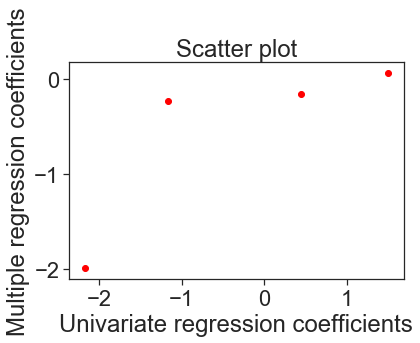

In [15]:
plt.scatter(X_Coefficients,Y_Coefficients, color='Red')
plt.title('Scatter plot')
plt.xlabel('Univariate regression coefficients')
plt.ylabel('Multiple regression coefficients')
plt.savefig('5.png')
plt.show()

Polynomial linear regression

In [16]:
abc=data.keys()
for i in range(0,len(abc)-1):
    poly = PolynomialFeatures(3)
    X=data[abc[i]].values.reshape(-1,1)
    q = poly.fit_transform(X,data['PE'])
    result = poly.get_params();
    clf = linear_model.LinearRegression()
    clf.fit(q, data['PE'])
    result = clf.predict(q)
    print(result)

[464.54684395 440.72181915 486.69856923 ... 433.03855824 442.03572569
 448.11655276]
[469.65228348 441.9171009  473.66562173 ... 434.94640782 437.14439759
 442.31226296]
[473.18603843 466.88248049 450.98309093 ... 452.42145112 454.27784589
 461.26891049]
[454.36925312 447.06920305 462.94065403 ... 440.72208905 448.6940829
 451.54461504]


Full linear regression for Ambient Temperature

In [17]:
X_Test_A = Test_data.iloc[:,0:1].values
Y_Test_A = Test_data.iloc[:,-1].values

X_Training_A = Training_data.iloc[:,0:1].values
Y_Training_A = Training_data.iloc[:,-1].values

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_Training_A = poly.fit_transform(X_Training_A)

model = LinearRegression()
model.fit(X_Training_A, Y_Training_A)
y_pred = model.predict(X_Test_A) 
print(y_pred)
Test_error_linear=np.append(Test_error_linear,model.score(X_Test_A, Y_Test_A))

[443.10516697 443.97507768 438.2989103  ... 429.01261348 443.88808661
 450.15144371]


Full linear regression for Exhaust Vaccum

In [18]:
X_Test_V = Test_data.iloc[:,1:2].values
Y_Test_V = Test_data.iloc[:,-1].values

X_Training_V = Training_data.iloc[:,1:2].values
Y_Training_V = Training_data.iloc[:,-1].values

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_Training_V = poly.fit_transform(X_Training_V)

model = LinearRegression()
model.fit(X_Training_V, Y_Training_V)
y_pred = model.predict(X_Test_V) 
print(y_pred)
Test_error_linear=np.append(Test_error_linear,model.score(X_Test_V, Y_Test_V))

[448.63077605 461.82142214 448.71256039 ... 430.97704155 436.67857857
 444.77522847]


Full linear regression for Ambient Pressure

In [19]:
X_Test_AP = Test_data.iloc[:,2:3].values
Y_Test_AP = Test_data.iloc[:,-1].values

X_Training_AP = Training_data.iloc[:,2:3].values
Y_Training_AP = Training_data.iloc[:,-1].values

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_Training_AP = poly.fit_transform(X_Training_AP)

model = LinearRegression()
model.fit(X_Training_AP, Y_Training_AP)
y_pred = model.predict(X_Test_AP) 
print(y_pred)
Test_error_linear=np.append(Test_error_linear,model.score(X_Test_AP, Y_Test_AP))

[454.28622975 439.25634701 453.762801   ... 453.89739696 455.30317704
 460.34304817]


Full linear regression for Relative humidity

In [20]:
X_Test_RH = Test_data.iloc[:,3:4].values
Y_Test_RH = Test_data.iloc[:,-1].values

X_Training_RH = Training_data.iloc[:,3:4].values
Y_Training_RH = Training_data.iloc[:,-1].values

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_Training_RH = poly.fit_transform(X_Training_RH)

model = LinearRegression()
model.fit(X_Training_RH, Y_Training_RH)
y_pred = model.predict(X_Test_RH)
print(y_pred)
Test_error_linear=np.append(Test_error_linear,model.score(X_Test_RH, Y_Test_RH))

[458.84649939 451.64761303 446.83189915 ... 437.93202905 449.56065408
 452.02012398]


Linear regreesion for 70% as training data

In [21]:
X_Training, X_Test, Y_Training, Y_Test = train_test_split(data,data['PE'], test_size=0.30)
model = LinearRegression()
model.fit(X_Training, Y_Training)
y_pred = model.predict(X_Test) 
mean_squared_error(Y_Test,y_pred)
Test_error_linear=np.append(Test_error_linear,model.score(X_Test, Y_Test))

Linear regreesion for 70% as training data with interactive terms and quadratic nonlinearities

In [22]:
X_Training, X_Test, Y_Training, Y_Test = train_test_split(data,data['PE'], test_size=0.30, random_state=0)
poly = PolynomialFeatures(degree=3,interaction_only=True,include_bias = False)
X_Training_Transform = poly.fit_transform(X_Training)
X_Test_Transform = poly.fit_transform(X_Test)
model = LinearRegression()
model.fit(X_Training_Transform, Y_Training)
y_pred = model.predict(X_Test_Transform)
model = sm.OLS(Y_Training,X_Training)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.937e+32
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:18:24   Log-Likelihood:             1.7982e+05
No. Observations:                6697   AIC:                        -3.596e+05
Df Residuals:                    6692   BIC:                        -3.596e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT         -4.441e-15   2.87e-15     -1.549      0.121   -1.01e-14    1.18e-15
V          -2.942e-15   1.06e-15     -2.767      0.006   -5.03e-15   -8.58e-16
AP          1.166e-15   6.44e-16      1.809      0.071   -9.77e-17    2.43e-15
RH          6.106e-16   5.64e-16      1.083      0.279   -4.95e-16    1.72e-15
PE             1.0000   1.28e-15   7.83e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                     1062.759   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.616
Skew:                           0.063   Prob(JB):                     4.62e-54
Kurtosis:                       2.070   Cond. No.                         535.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X_Training=X_Training.drop(columns=["RH"])
X_Test=X_Test.drop(columns=["RH"])
model = sm.OLS(Y_Training,X_Training)
result1 = model.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.772e+33
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:18:24   Log-Likelihood:             1.8596e+05
No. Observations:                6697   AIC:                        -3.719e+05
Df Residuals:                    6693   BIC:                        -3.719e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT          5.329e-15   9.82e-16      5.429      0.000     3.4e-15    7.25e-15
V           5.329e-15   4.15e-16     12.856      0.000    4.52e-15    6.14e-15
AP         -1.388e-15   2.47e-16     -5.625      0.000   -1.87e-15   -9.04e-16
PE             1.0000   4.98e-16   2.01e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                     3688.050   Durbin-Watson:                   0.216
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              402.082
Skew:                          -0.183   Prob(JB):                     4.89e-88
Kurtosis:                       1.857   Cond. No.                         464.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE for test and train

In [24]:
pred_values=result1.predict(X_Test)
mean_squared_error(Y_Test,pred_values)

4.462756992005889e-26

KNN Regression for normalized data

In [25]:
X_Test_regr=Test_data.iloc[:,:-1].values
Y_Test_regr=Test_data.iloc[:, 4].values
X_Training_regr=Training_data.iloc[:,:-1].values
Y_Training_regr=Training_data.iloc[:, 4].values

scaler = StandardScaler()  
scaler.fit(X_Training_regr)

X_Training_regr = scaler.transform(X_Training_regr)
X_Test_regr = scaler.transform(X_Test_regr)

Training_error_Norm=[]
Test_error_Norm=[]
Regr_error = []
best_k = []
for i in range(1,101):
    neigh_regr = KNeighborsRegressor(n_neighbors=i)
    neigh_regr.fit(X_Training_regr, Y_Training_regr)
    regr_pred = neigh_regr.predict(X_Test_regr)
    Regr_error.append(np.mean(Regr_error != Y_Test_regr))
    best_k.append(i)
    Training_error_Norm.append(neigh_regr.score(X_Training_regr, Y_Training_regr))
    Test_error_Norm.append(neigh_regr.score(X_Test_regr, Y_Test_regr))
best_k_regr=Regr_error.index(min(Regr_error))
k_star=best_k[best_k_regr]

Best K value

In [26]:
print(k_star)

1


KNN Regression for raw data

In [ ]:
X_Test_regr=Test_data.iloc[:,:-1].values
Y_Test_regr=Test_data.iloc[:, 4].values
X_Training_regr=Training_data.iloc[:,:-1].values
Y_Training_regr=Training_data.iloc[:, 4].values

Training_error_raw=[]
Test_error_raw=[]
Regr_error = []
best_k = []
for i in range(1,101):
    neigh_regr = KNeighborsRegressor(n_neighbors=i)
    neigh_regr.fit(X_Training_regr, Y_Training_regr)
    regr_pred = neigh_regr.predict(X_Test_regr)
    Regr_error.append(np.mean(Regr_error != Y_Test_regr))
    best_k.append(i)
    Training_error_raw.append(neigh_regr.score(X_Training_regr, Y_Training_regr))
    Test_error_raw.append(neigh_regr.score(X_Test_regr, Y_Test_regr))
best_k_regr=Regr_error.index(min(Regr_error))
k_star=best_k[best_k_regr]

Best K value

In [28]:
print(k_star)

1


Plot the train and test errors in terms of 1/k

In [29]:
k=[1/x for x in range(1,101)]

Text(0, 0.5, 'Training errors')

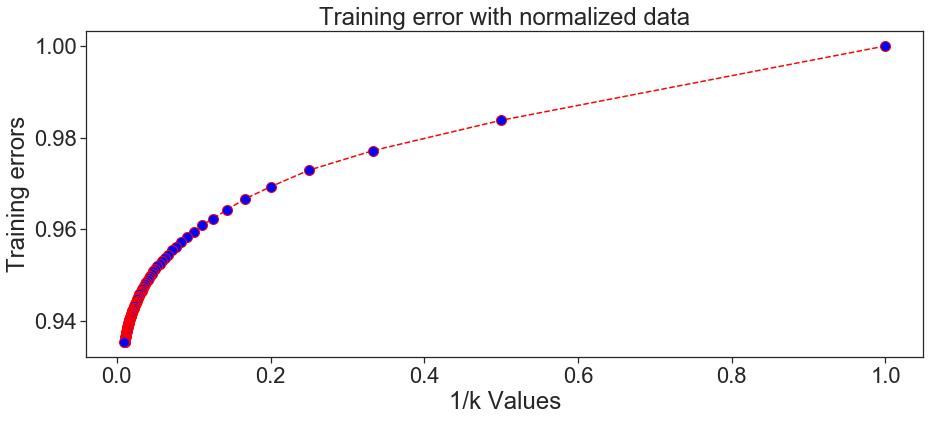

In [30]:
plt.figure(figsize=(15, 6))  
plt.plot(k, Training_error_Norm, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Training error with normalized data')  
plt.xlabel('1/k Values')  
plt.ylabel('Training errors')

Text(0, 0.5, 'Test errors')

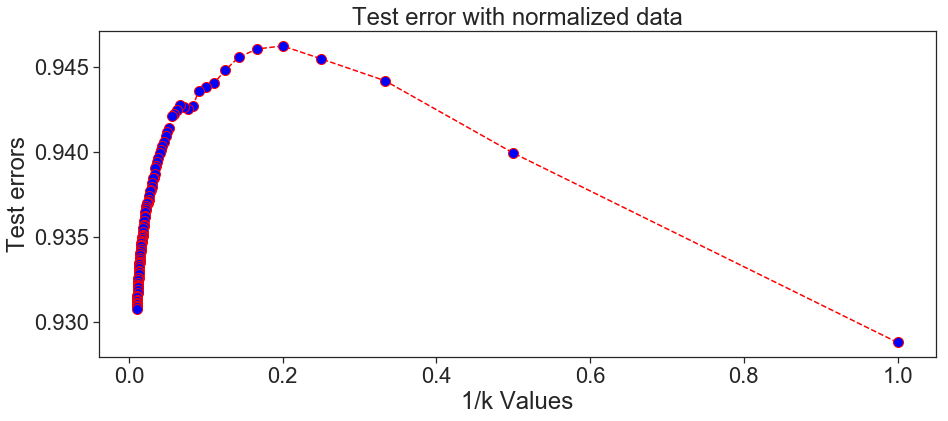

In [31]:
plt.figure(figsize=(15, 6))  
plt.plot(k, Test_error_Norm, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Test error with normalized data')  
plt.xlabel('1/k Values')  
plt.ylabel('Test errors')

Text(0, 0.5, 'Training errors')

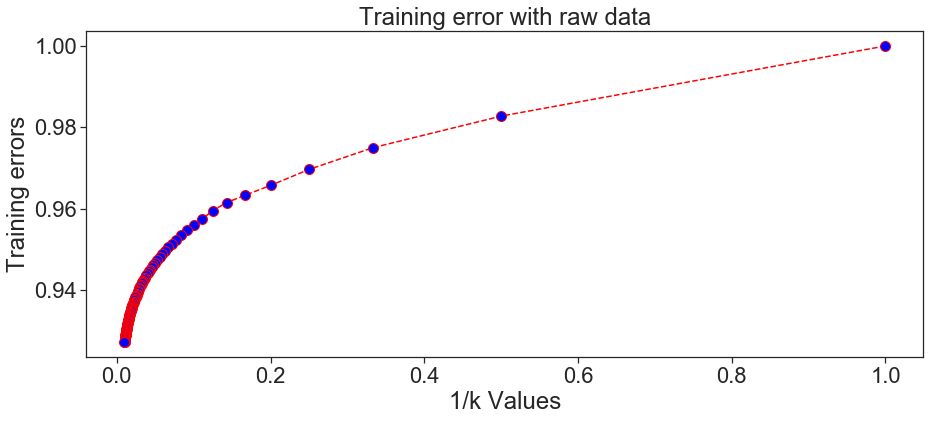

In [32]:
plt.figure(figsize=(15, 6))  
plt.plot(k, Training_error_raw, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Training error with raw data')  
plt.xlabel('1/k Values')  
plt.ylabel('Training errors')

Text(0, 0.5, 'Test errors')

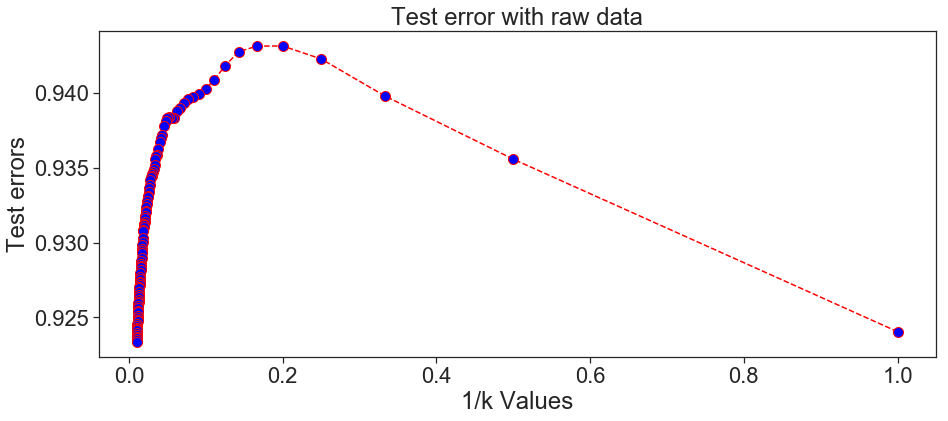

In [33]:
plt.figure(figsize=(15, 6))  
plt.plot(k, Test_error_raw, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Test error with raw data')  
plt.xlabel('1/k Values')  
plt.ylabel('Test errors')

Minimum error rate for KNN regression

In [41]:
print(min(Regr_error))

1.0


Minimum error rate for Linear regression

In [42]:
print(min(Test_error_linear[Test_error_linear != np.array(None)]))

-996.7551296130356
